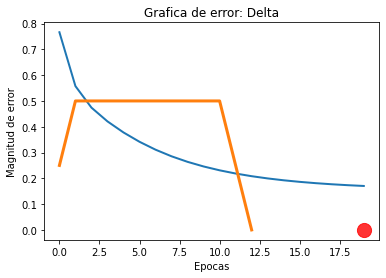

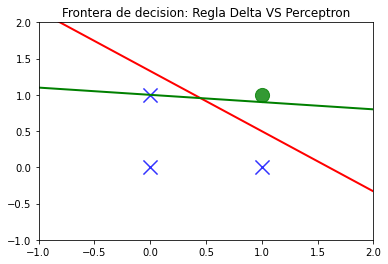

In [1]:
"""
Perceptron Vs Delta
"""
import numpy as np
import matplotlib.pyplot as plt
import time
#%% vector adaline
err_vectorA = []
w_fA = []

#%% vector perceptron
err_vectorP  = []
w_fP = []

#%% Entradas Adaline
xA = np.array([[0,0],[0,1],[1,0],[1,1]])
#%% Entradas Perceptron
xP = np.array([[0,0],[0,1],[1,0],[1,1]])

#%% Target adaline
tA = np.array([[1],[1],[1],[-1]])
alphaA = 0.1

#%% Target perceptron
tP = np.array([[1],[1],[1],[0]])

#%% bias adaline
biasA = np.shape(xA)[0]
biasA = -1 * np.ones((biasA,1))

#%% bias perceptron
biasP =np.shape(xP)[0]
biasP = -1 * np.ones((biasP,1))

#%% Vector aumentado Adaline
xA = np.concatenate([xA,biasA], axis = 1)

#%% Vector aumentado Perceptron
xP = np.concatenate([xP,biasP], axis = 1)

#%% Vector de pesos para adaline
w_iA = np.array([[1],[-1],[-1]])

#%% Vector de pesos para perceptron
w_iP = np.array([[1],[-1],[-1]])

#%% Regla Delta
ticA = time.time()

aA = np.dot(xA,w_iA)

#Funcion lineal
yA = aA

#Error
errA = np.sum(0.5 * (tA - yA)**2)
epochA = 0

#Entrenamiento
for i in range(20):
    epochA+=1
    for i in range(np.shape(xA)[0]):
        aA = np.dot(xA[i] , w_iA)
        yA[i] = aA
        
        #Actualizacvion de pesos
        x_pA = np.reshape(xA[i], (len(w_iA),1))
        w_nA = w_iA + alphaA * (tA[i] - yA[i]) * x_pA
        w_iA = w_nA
    
    errA = (np.sum(0.5 * (tA - yA)**2)) / len(tA)
    err_vectorA.append(errA)
    
    w_fA.append(w_iA)

tocA = time.time()


#%%Regla Perceptron 
ticP = time.time()

aP = np.dot(xP,w_iP)

#funcion limite duro
yP = np.uint32(aP >=0)

errP = sum((tP - yP)**2)/len(yP)

epoch=0
# Entrenar
while(sum(yP != tP)):
    epoch+=1
    for i in range(np.shape(xP)[0]):
        aP = np.dot(xP[i],w_iP)
        yP[i] = np.uint32(aP>=0)
        
        #actualizamos los pesos
        x_pP = np.reshape(xP[i],(len(w_iP),1))
        w_nP = w_iP + alphaA * (tP[i] - yP[i])*x_pP
        w_iP = w_nP
    
    errP = sum((tP - yP)**2)/len(yP)
    err_vectorP.append(errP)
    
    w_fP.append(w_iP)

tocP= time.time()
#%% Graficar errores
plt.figure(0)
plt.plot(err_vectorA,linewidth = 2)
plt.plot(err_vectorP,linewidth = 3)
plt.title('Grafica de error: Delta')
plt.ylabel("Magnitud de error")
plt.xlabel("Epocas")
plt.scatter(len(err_vectorA)-1, 0, color = 'r', s=200, marker = 'o', alpha = 0.8)
plt.show()

#%% Grafica
plt.xlim([-1.0,2.0])
plt.ylim([-1.0,2.0])

patterns = np.unique(tA)
for patt in patterns:
    pos = np.where(patt == tA)[0]
    if patt == -1:
        plt.scatter(xA[pos,0],xA[pos,1],color = 'g', s =200, marker = 'o', alpha = 0.8)
    else:
        plt.scatter(xA[pos,0],xA[pos,1], color= 'b', s =200, marker = 'x', alpha = 0.8)

x1A = np.linspace(-1,2)
x2A = w_iA[2] / w_iA[1] - (x1A * w_iA[0] / w_iA[1])

x2P = w_iP[2] / w_iP[1] - (x1A * w_iP[0] / w_iP[1])

plt.figure(1)
plt.plot(x1A,x2A,'r',linewidth = 2)
plt.plot(x1A,x2P,'g', linewidth = 2)
plt.title("Frontera de decision: Regla Delta VS Perceptron")
plt.show()